In [2]:
# Overview: This is a workbook to demonstrate the following supervised/unsupervised learning methods:
# 1 K-Means Clustering (Unsupervised)
# 2 Support Vector Machines (SVMs) (Supervised)
# 3 (Multinomial) Naïve Bayes (MultinomialNB) (Supervised)
# 4 Logistic Regression (Supervised)
# jennifer.sleeman@northwestern.edu


In [2]:
#if you would like to explore oversampling for class imbalance
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 


In [1]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import os

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

import matplotlib.colors as mcolors


In [109]:
#Custom functions required as part of demonstration

more_stopwords=["root","editorial","added","though","father","mother","keywords","sourcedate","location","really","review","title","total","ranking","brief","summary","count","would","could","place","ordered","staff","service","experience","private","court"]
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

def clean_doc(doc): 
    doc = doc.replace("<NL>"," ")
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    swl=stopwords.words('english')
    swl.extend(more_stopwords)
    stop_words = set(swl)
    tokens = [w for w in tokens if not w in stop_words]   
    lem = WordNetLemmatizer()
    tokens_lem =[lem.lemmatize(w) for w in tokens]
    #stemmer=PorterStemmer()
    #tokens_stem = [stemmer.stem(w) for w in tokens_lem]
    return tokens_lem

def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

def tfidf(corpus, titles, ngram_range = (1,1), labels=None):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range=(1,1))

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names_out()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names_out(), index=titles)
    return matrix


def One_Hot(variable):
    #this is a function to one hot encode the classes
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels



In [110]:
print(data.columns)


Index(['Unnamed: 0', 'label', 'title', 'content', 'processed_text'], dtype='object')


In [111]:
#Section 1: K-Means
def k_means(titles, tfidf_matrix, k=3):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    #Returns dataframe indicating cluster number per document

    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])
    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            title=title.replace(".txt","")
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list

    print(cluster_title)
    return cluster_title,clusters,frame



In [112]:
mcolors.XKCD_COLORS

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 'xkcd:yellowish tan': '#fcfc81',
 'xkcd:cement': '#a5a391',
 'xkcd:dark grass green': '#388004',
 'xkcd:dusty teal': '#4c9085',
 'xkcd:grey teal': '#5e9b8a',
 'xkcd:macaroni and cheese': '#efb435',
 'xkcd:pinkish tan': '#d99b82',
 'xkcd:spruce': '#0a5f38',
 'xkcd:strong blue': '#0c06f7',
 'xkcd:toxic green': '#61de2a',
 'xkcd:windows blue': '#3778bf',
 'xkcd:blue blue': '#2242c7',
 'xkcd:blue with a hint of purple': '#533cc6',
 'xkcd:booger': '#9bb53c',
 'xkcd:bright sea green': '#05ffa6',
 'xkcd:dark green blue': '#1f6357',
 'xkcd:deep turquoise': '#017374',
 'xkcd:green teal': '#0cb577',
 'xkcd:strong pink': '#ff0789',
 'xkcd:bland': '#afa88b',
 'xkcd:deep aqua': '#0

In [113]:
import matplotlib.colors as mcolors
def plot_tfidf_matrix(cluster_title,clusters,TFIDF_matrix):
    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    

    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    dist = 1 - cosine_similarity(TFIDF_matrix)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]


    #set up colors per clusters using a dict.  number of colors must correspond to K


    cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'yellow', 
                      5:'#bffe28', 6:'pink', 7:'purple',8:'grey',9:'black',10:'cyan',11:'magenta',12:'brown',13:'#d4ffff',
                     14:'#017374',15:'#d3b683',16:'#4f738e'}


    #set up cluster names using a dict.  
    cluster_dict=cluster_title

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

    #group by cluster
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(5,5)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
                label=cluster_dict[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='on')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='on')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})      #show legend with only 1 point



In [114]:
#Section 3, 4, 5: Classifiers
def classifiers(x, y, model_type, cv = 3):
    
    #this function is to fit 3 different model scenarios.  Support vector machines, logistic regressions, naive bayes.
    #svm = Support vector machin
    #logistic = Logistic regression
    #naive_bayes = Naive Bayes Multinomial
    
    #can define cv value for cross validation.
    
    #function returns the train test split scores of each model.
    
    if model_type == 'svm':
        print("svm")
        model = SVC()

    elif model_type == 'logistic':
        print("logistic")
        model = LogisticRegression()

    elif model_type == 'naive_bayes':
        print("naive_bayes")
        model = MultinomialNB()
    
    #change the test set size 
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    
    #NOTE THIS IS AN OVERFIT CASE SO YOU KNOW THAT IT IS WORKING
    #ONCE YOU GET CLOSE TO 100% ACCURACY THEN COMMENT OUT THESE TWO LINES
#     predictions = model.predict(X_train)
#     accy = accuracy_score(y_train, predictions)
    
    #NOTE THIS IS THE CORRECT WAY TO TEST YOUR CLASSIFIERS
    #UNCOMMENT THESE TWO LINES ONCE THE OVERFIT CASE YIELDS CLOSE TO 100% ACCURACY
    predictions = model.predict(X_test)
    accy = accuracy_score(y_test, predictions)

    # Check the results using metrics
    # O.P cm=metrics.confusion_matrix(predictions, y_test) changed to y_train
    from sklearn import metrics
    cm=metrics.confusion_matrix(predictions, y_test)
    import seaborn as sns
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    return accy

In [115]:
#this section of the code prepares the required variables to run functions set for each 
#section of code

    
#read in class corpus csv into python
data=pd.read_csv(r"C:\Users\opw477\OneDrive - Northwestern University\Desktop\MSDS_453\venv4\MSDS_453 files\TripAdvisor_v2_with_coarse_labels.csv")
#data=pd.read_csv(r"C:\Users\opw477\OneDrive - Northwestern University\Desktop\MSDS_453\venv4\MSDS_453 files\TripAdvisor_v2_with_coarse_labels.csv")


#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['content'].apply(lambda x: clean_doc(x))



#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['title'].tolist()

processed_text = data['processed_text'].tolist()


#generate tfidf for analysis
tfidf_matrix = tfidf(final_processed_text, titles,ngram_range = (1,6))

In [116]:
# Section 1: Execute K-means clustering
cluster_title,clusters,k_means_df = k_means(titles, tfidf_matrix, k=14)

#labels used for supervised learning
labels = k_means_df['Cluster']

{0: ['AJD_ds1_Roots_Run_Deep_Winery_todo', 'AJD_ds1_Buena_Vista_Winery_todo', 'AJD_ds1_Rutherford_Hill_Winery_todo', 'AJD_ds1_Matanzas_Creek_Winery_todo', 'AJD_ds1_Paradise_Ridge_Winery_todo'], 1: ['TJD_Doc4_Paris_HotelMalte_Review_hotel', 'RP_Doc1_Oiistar_restaurant', 'mb-doc5-st-george-inn_hotel', 'OP_Doc5_Incredible-Hilton-Experience_hotel', 'OP_Doc2_Great-Experience-London_hotel', 'OP_Doc1_The-Peninsula-Is_hotel'], 2: ['esimion_ds1_atx_aba_four.docx_restaurant', 'esimion_ds1_atx_aba_three.docx_restaurant', 'esimion_ds1_atx_aba_two.docx_restaurant', 'RP_Doc5_Girl_And_The_Goat_restaurant', 'RP_Doc4_Daisies_restaurant', 'gr_ds1_project_brunch_review_restaurant', 'gr_ds1_the_skillet_review_restaurant', 'KK_Doc5_Caruso_s_Grocery_Restaurant_restaurant', 'KK_Doc3_Alta Strada_Restaurant_restaurant', 'KK_Doc1_Fiola_Mare_Restaurant_restaurant'], 3: ['EH_Doc1_Rintaro_Review.rtf_restaurant', 'EH_Doc1_Rintaro_Review.rtf.docx_restaurant'], 4: ['KH_Doc1_A-Flavorful-Journey-At-HiLife-Poke_restaura

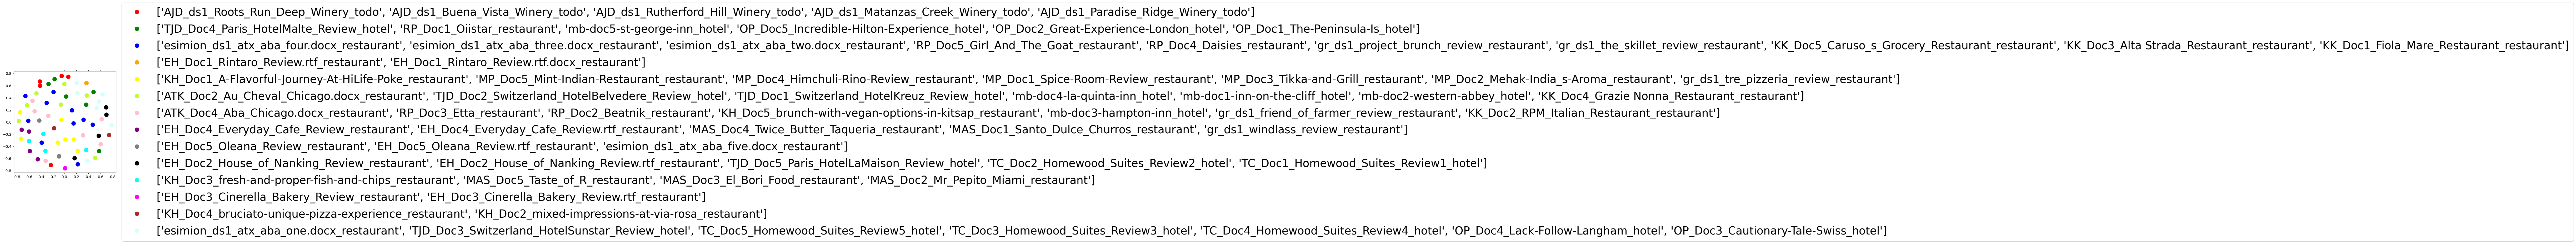

In [117]:
plot_tfidf_matrix(cluster_title,clusters,tfidf_matrix)

In [118]:
print(labels)

0      5
1      7
2     11
3      8
4      9
      ..
67     1
68    13
69     1
70     1
71    13
Name: Cluster, Length: 72, dtype: int64


svm


0.13636363636363635

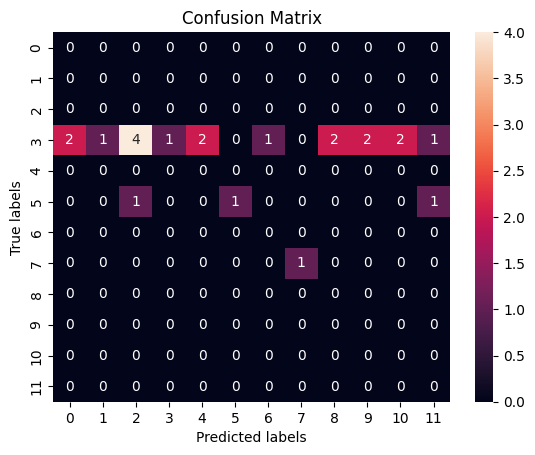

In [119]:
#Section 2: Support Vector Machines
classifiers(tfidf_matrix, labels, 'svm')

logistic


0.18181818181818182

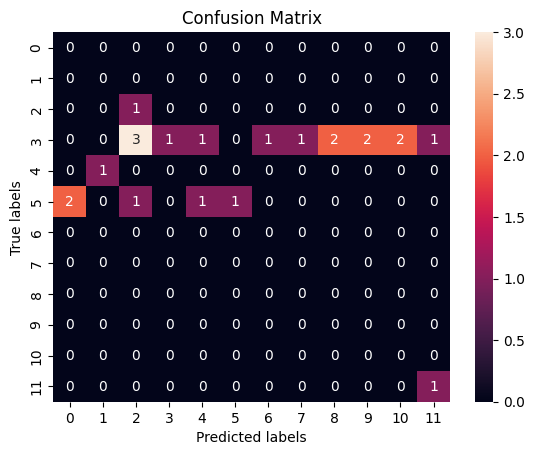

In [120]:
#Section 3: Logistic Regression
classifiers(tfidf_matrix, labels, 'logistic')
    


naive_bayes


0.18181818181818182

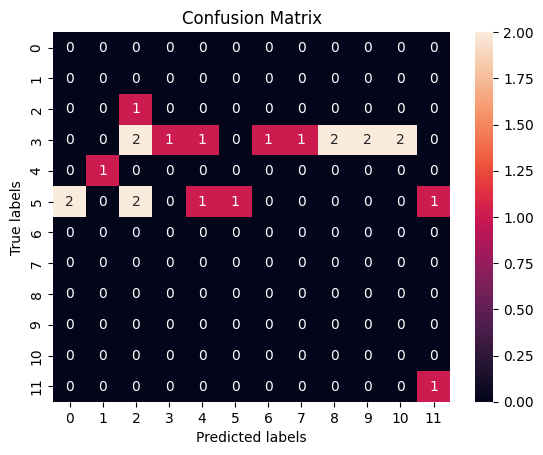

In [121]:
#Section 4: Naive Bayes
classifiers(tfidf_matrix, labels, 'naive_bayes')
    


In [122]:
#If you are working with the trip advisor dataset you could use the actual labels
real_labels = data['label'].tolist()


In [123]:
print(real_labels)
from collections import Counter

label_counts = Counter(real_labels)
print(label_counts)


['restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'hotel', 'hotel', 'restaurant', 'restaurant', 'restaurant', 'hotel', 'hotel', 'hotel', 'winery', 'winery', 'winery', 'restaurant', 'winery', 'winery', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'hotel', 'hotel', 'hotel', 'hotel', 'hotel', 'restaurant', 'restaurant', 'restaurant', 'hotel', 'hotel', 'hotel', 'hotel', 'hotel', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'restaurant', 'hotel', 'hotel', 'hotel', 'hotel', 'hotel']
Counter({'restaurant': 47, 'hotel': 20, 'winery': 5})


svm


0.7727272727272727

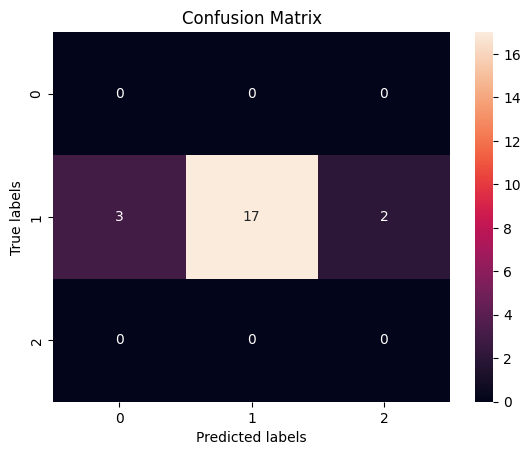

In [124]:
#real labels
#Section 2: Support Vector Machines
classifiers(tfidf_matrix, real_labels, 'svm')

logistic


0.8636363636363636

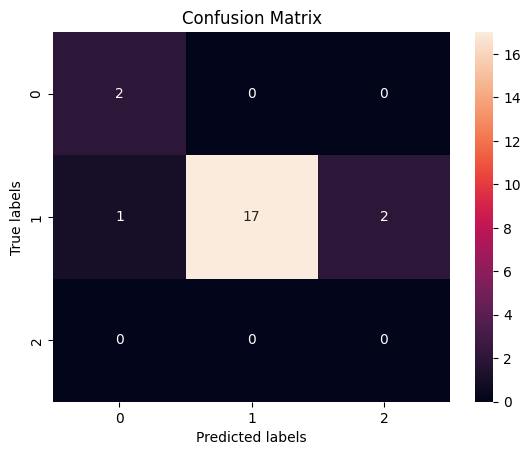

In [125]:
#Section 3: Logistic Regression
classifiers(tfidf_matrix, real_labels, 'logistic')
    

naive_bayes


0.8636363636363636

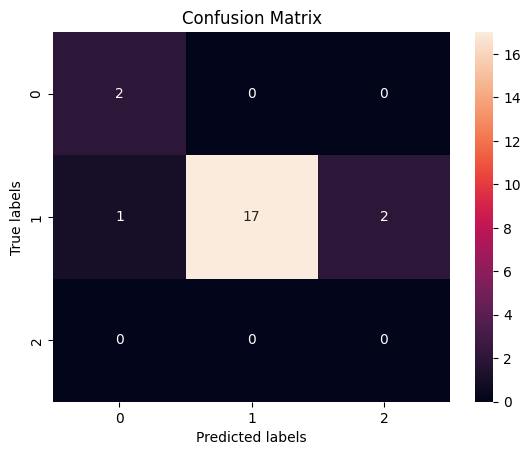

In [126]:
#Section 4: Naive Bayes
classifiers(tfidf_matrix, real_labels, 'naive_bayes')
    

In [127]:
tfidf_matrix

,absolute,absolutely,access,accommodate,accommodating,accompanying,accordingly,accounting,accustomed,acknowledgment,...,yelled,yelling,yellow,yogurt,youll,young,youre,youve,yummy,zentrum
ATK_Doc2_Au_Cheval_Chicago.docx.txt_restaurant,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EH_Doc4_Everyday_Cafe_Review.txt_restaurant,0.0,0.0,0.162728,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EH_Doc3_Cinerella_Bakery_Review.txt_restaurant,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EH_Doc5_Oleana_Review.txt_restaurant,0.0,0.0,0.000000,0.000000,0.0,0.0,0.073312,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EH_Doc2_House_of_Nanking_Review.txt_restaurant,0.0,0.0,0.000000,0.109353,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OP_Doc5_Incredible-Hilton-Experience.txt_hotel,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OP_Doc4_Lack-Follow-Langham.txt_hotel,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OP_Doc2_Great-Experience-London.txt_hotel,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OP_Doc1_The-Peninsula-Is.txt_hotel,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
